In [160]:
#Import required packages
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
load_dotenv()

True

# Dataset 1: Accessing and Loading Twitter API
## Section A: Create API Connection

In [161]:
#access twitter api using .env to hide keys/tokens
api_key = os.getenv('API_KEY')
api_secrets = os.getenv('API_SECRETS')
access_token = os.getenv('ACCESS_TOKEN')
access_secret = os.getenv('ACCESS_SECRET')
 
# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_secret)
 
api = tweepy.API(auth)
 
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Successful Authentication


## Section B: Create/Test Timeline Access

In [167]:
#access to truncated and extended text
tweets_truncated = api.user_timeline(id='business', count=200)
tweets_extended = api.user_timeline(id='business', tweet_mode='extended', count=200)
 
#Look into sample json output
tweets = tweets_extended[10]
json = tweets._json
json

Unexpected parameter: id
Unexpected parameter: id


{'created_at': 'Sun Oct 23 17:13:38 +0000 2022',
 'id': 1584231585791897600,
 'id_str': '1584231585791897600',
 'full_text': 'UniCredit acted as financial adviser to MSC, while Lazard advised Rimorchiatori Riuniti and DWS https://t.co/lmIY62u9tv',
 'truncated': False,
 'display_text_range': [0, 119],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/lmIY62u9tv',
    'expanded_url': 'https://trib.al/mF0XYc0',
    'display_url': 'trib.al/mF0XYc0',
    'indices': [96, 119]}]},
 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 34713362,
  'id_str': '34713362',
  'name': 'Bloomberg',
  'screen_name': 'business',
  'location': 'New York and the World',
  'description': 'The first word in business news.\nOur newsletters: https://t.c

## Section C: Pull in Data to create DataFrame

In [174]:
#access 5 finance twitter accounts
accounts = ['MarketWatch', 'business', 'YahooFinance', 'WallStreetOasis', 'nytimes']
#creating dict keys that I want data for
dict_keys = ['created_at', 'id', 'full_text', 'entities', 'retweet_count', 'favorite_count', 'user']
#initializing empty dictionary to append to
tweet_dict = {}
i = 0

#running through all accounts - 100 tweets 
#for empty values- return 'no data'
for account in accounts:
    tweets = api.user_timeline(id=account, count=200, tweet_mode='extended')
    hundred_tweets = tweets[0 : 100]
    for tweet in hundred_tweets:
        json = tweet._json
        #for first iteration- create key/value pair
        if i == 0:
            for key in dict_keys:
                if key == 'entities':
                    try:
                        tweet_dict['url'] = [json[key]['urls'][0].get('expanded_url')]
                    except:
                        tweet_dict['url'] = ['no data']
                elif key == 'user':
                    try:
                        tweet_dict['name'] = [json[key].get('name')]
                    except:
                        tweet_dict['url'] = ['no data']
                else:
                    tweet_dict[key] = [json.get(key)]
            i+=1
        #append to dictionary keys
        else:
            for key in dict_keys:
                if key == 'entities':
                    try:
                        tweet_dict['url'].append(json[key]['urls'][0].get('expanded_url'))
                    except:
                        tweet_dict['url'].append('no data')
                elif key == 'user':
                    try:
                        tweet_dict['name'].append(json[key].get('name'))
                    except:
                        tweet_dict['url'].append('no data')
                else:
                    tweet_dict[key].append(json.get(key))
                    
        i+=1
#creating twitter DF
twitter_df = pd.DataFrame.from_dict(tweet_dict)
twitter_df

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


,created_at,id,full_text,url,retweet_count,favorite_count,name
0,Sun Oct 23 17:31:42 +0000 2022,1584236131713191936,Big Tech has been an earnings refuge for years...,https://trib.al/tpFdCTU,1,2,MarketWatch
1,Sun Oct 23 17:06:21 +0000 2022,1584229754957615104,Earnings preview: Amid reports of production c...,https://trib.al/jhweqbO,1,5,MarketWatch
2,Sun Oct 23 16:39:29 +0000 2022,1584222992531591168,What Liz Truss can teach every worker in Ameri...,https://trib.al/mSs7vvY,3,11,MarketWatch
3,Sun Oct 23 16:13:09 +0000 2022,1584216363429597185,Wall Street is worried that consumer spending ...,https://trib.al/joB1Tpt,1,7,MarketWatch
4,Sun Oct 23 15:45:39 +0000 2022,1584209444413394945,OPINION: As Snap stock heads toward its lowest...,https://trib.al/ZMUFADK,1,8,MarketWatch
...,...,...,...,...,...,...,...
495,Sat Oct 22 14:51:25 +0000 2022,1583833409461198849,Forcibly transferring people out of an occupie...,https://nyti.ms/3VOAgaV,135,296,The New York Times
496,Sat Oct 22 14:49:59 +0000 2022,1583833049204391936,Others described a wrenching process of coerci...,no data,70,216,The New York Times
497,Sat Oct 22 14:49:46 +0000 2022,1583832991922470912,"""I didn't want to go,"" said one 14-year-old gi...",no data,42,171,The New York Times
498,Sat Oct 22 14:49:10 +0000 2022,1583832842781757441,"Through interviews with parents, officials, do...",no data,32,165,The New York Times


## Section D: Explore Data

In [178]:
twitter_df.describe()

,id,retweet_count,favorite_count
count,5.000000e+02,500.000000,500.000000
mean,1.583261e+18,154.362000,109.462000
std,1.591746e+15,1469.962817,834.366514
min,1.577687e+18,0.000000,0.000000
25%,1.583531e+18,1.000000,1.000000
50%,1.583890e+18,6.000000,11.000000
75%,1.584157e+18,17.000000,34.000000
max,1.584238e+18,24450.000000,17778.000000


In [184]:
#add official date time object as column
twitter_df['datetime'] = pd.to_datetime(twitter_df['created_at'])
twitter_df.head()

,created_at,id,full_text,url,retweet_count,favorite_count,name,datetime
0,Sun Oct 23 17:31:42 +0000 2022,1584236131713191936,Big Tech has been an earnings refuge for years...,https://trib.al/tpFdCTU,1,2,MarketWatch,2022-10-23 17:31:42+00:00
1,Sun Oct 23 17:06:21 +0000 2022,1584229754957615104,Earnings preview: Amid reports of production c...,https://trib.al/jhweqbO,1,5,MarketWatch,2022-10-23 17:06:21+00:00
2,Sun Oct 23 16:39:29 +0000 2022,1584222992531591168,What Liz Truss can teach every worker in Ameri...,https://trib.al/mSs7vvY,3,11,MarketWatch,2022-10-23 16:39:29+00:00
3,Sun Oct 23 16:13:09 +0000 2022,1584216363429597185,Wall Street is worried that consumer spending ...,https://trib.al/joB1Tpt,1,7,MarketWatch,2022-10-23 16:13:09+00:00
4,Sun Oct 23 15:45:39 +0000 2022,1584209444413394945,OPINION: As Snap stock heads toward its lowest...,https://trib.al/ZMUFADK,1,8,MarketWatch,2022-10-23 15:45:39+00:00


In [188]:
#add EST Time
twitter_df['EST'] = twitter_df['datetime'].dt.tz_convert('US/Eastern')
twitter_df.head()

,created_at,id,full_text,url,retweet_count,favorite_count,name,datetime,EST
0,Sun Oct 23 17:31:42 +0000 2022,1584236131713191936,Big Tech has been an earnings refuge for years...,https://trib.al/tpFdCTU,1,2,MarketWatch,2022-10-23 17:31:42+00:00,2022-10-23 13:31:42-04:00
1,Sun Oct 23 17:06:21 +0000 2022,1584229754957615104,Earnings preview: Amid reports of production c...,https://trib.al/jhweqbO,1,5,MarketWatch,2022-10-23 17:06:21+00:00,2022-10-23 13:06:21-04:00
2,Sun Oct 23 16:39:29 +0000 2022,1584222992531591168,What Liz Truss can teach every worker in Ameri...,https://trib.al/mSs7vvY,3,11,MarketWatch,2022-10-23 16:39:29+00:00,2022-10-23 12:39:29-04:00
3,Sun Oct 23 16:13:09 +0000 2022,1584216363429597185,Wall Street is worried that consumer spending ...,https://trib.al/joB1Tpt,1,7,MarketWatch,2022-10-23 16:13:09+00:00,2022-10-23 12:13:09-04:00
4,Sun Oct 23 15:45:39 +0000 2022,1584209444413394945,OPINION: As Snap stock heads toward its lowest...,https://trib.al/ZMUFADK,1,8,MarketWatch,2022-10-23 15:45:39+00:00,2022-10-23 11:45:39-04:00


In [201]:
#add text length of tweet
twitter_df['text_length'] = twitter_df['full_text'].str.len()
twitter_df.head()

,created_at,id,full_text,url,retweet_count,favorite_count,name,datetime,EST,text_length
0,Sun Oct 23 17:31:42 +0000 2022,1584236131713191936,Big Tech has been an earnings refuge for years...,https://trib.al/tpFdCTU,1,2,MarketWatch,2022-10-23 17:31:42+00:00,2022-10-23 13:31:42-04:00,108
1,Sun Oct 23 17:06:21 +0000 2022,1584229754957615104,Earnings preview: Amid reports of production c...,https://trib.al/jhweqbO,1,5,MarketWatch,2022-10-23 17:06:21+00:00,2022-10-23 13:06:21-04:00,273
2,Sun Oct 23 16:39:29 +0000 2022,1584222992531591168,What Liz Truss can teach every worker in Ameri...,https://trib.al/mSs7vvY,3,11,MarketWatch,2022-10-23 16:39:29+00:00,2022-10-23 12:39:29-04:00,86
3,Sun Oct 23 16:13:09 +0000 2022,1584216363429597185,Wall Street is worried that consumer spending ...,https://trib.al/joB1Tpt,1,7,MarketWatch,2022-10-23 16:13:09+00:00,2022-10-23 12:13:09-04:00,262
4,Sun Oct 23 15:45:39 +0000 2022,1584209444413394945,OPINION: As Snap stock heads toward its lowest...,https://trib.al/ZMUFADK,1,8,MarketWatch,2022-10-23 15:45:39+00:00,2022-10-23 11:45:39-04:00,203


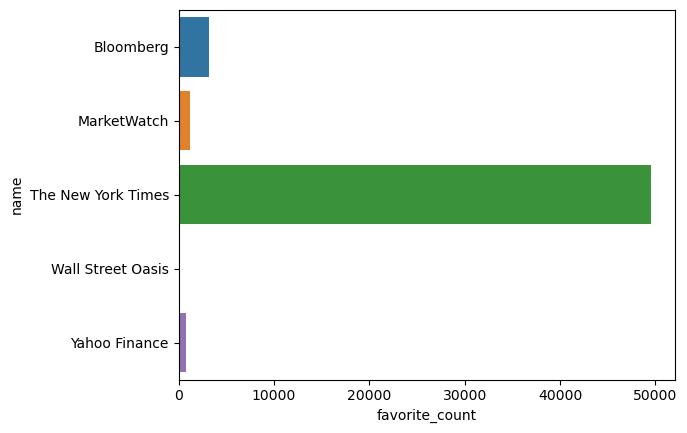

In [206]:
#examining favorite counts by account
grouped_favorites = pd.DataFrame(twitter_df.groupby('name')['favorite_count'].sum())
sns.barplot(data=grouped_favorites, x='favorite_count', y=grouped_favorites.index)
plt.show()

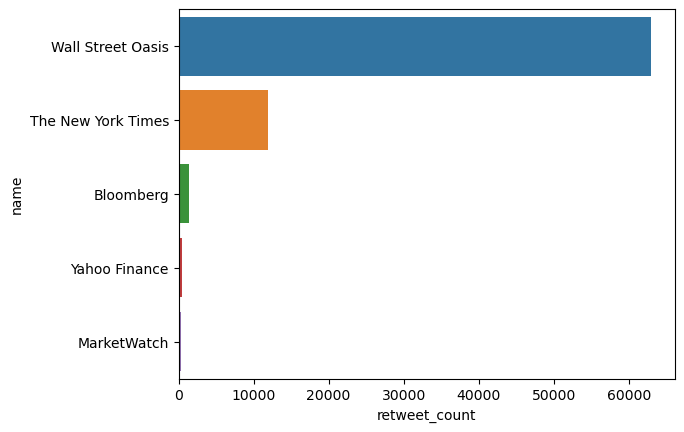

In [209]:
#examine retweets by account
grouped_retweets = pd.DataFrame(twitter_df.groupby('name')['retweet_count'].sum().sort_values(ascending=False))
sns.barplot(data=grouped_retweets, x='retweet_count', y=grouped_retweets.index)
plt.show()

## Section E: Create CSV

In [210]:
#Create CSV
twitter_df.to_csv('financetweets.csv')

# Dataset 2: Analyzing Make Up of the S&P 500
## Section A: Read CSV taken from Kaggle
### Rest of Datasets from https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks

In [212]:
#create dataframe and examine head
spcompanies = pd.read_csv('sp500_companies.csv')
spcompanies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,147.27,2366746918912,1.295570e+11,0.019,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.070529
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,242.12,1817832062976,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.054171
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.13,1322972479488,9.688700e+10,0.126,Mountain View,CA,United States,174014.0,Alphabet Inc. provides various products and pl...,0.039425
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.48,1319432880128,9.688700e+10,0.126,Mountain View,CA,United States,174014.0,Alphabet Inc. provides various products and pl...,0.039319
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,119.32,1215584403456,5.262000e+10,0.072,Seattle,WA,United States,1523000.0,"Amazon.com, Inc. engages in the retail sale of...",0.036224


## Section B: Examine and Explore Current Data

In [219]:
#examine basic details
print(spcompanies.describe())
print(spcompanies.info())

       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    495.000000  4.950000e+02  4.640000e+02     493.000000   
mean     152.985525  6.779199e+10  6.074628e+09       0.610320   
std      254.780212  1.769839e+11  1.218288e+10       7.771756   
min        6.660000  4.291737e+09 -2.586000e+09      -0.643000   
25%       55.310000  1.484046e+10  1.371575e+09       0.032000   
50%       95.390000  2.734154e+10  2.562371e+09       0.102000   
75%      175.800000  5.673580e+10  5.656601e+09       0.194000   
max     4046.650000  2.366747e+12  1.295570e+11     167.368000   

       Fulltimeemployees      Weight  
count       4.880000e+02  495.000000  
mean        5.565945e+04    0.002020  
std         1.451226e+05    0.005274  
min         1.050000e+02    0.000128  
25%         9.259250e+03    0.000442  
50%         1.937500e+04    0.000815  
75%         5.315000e+04    0.001691  
max         2.300000e+06    0.070529  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 

In [221]:
#Examine null situations
print(spcompanies.isna().any())
print(spcompanies.isna().sum())

Exchange               False
Symbol                 False
Shortname              False
Longname               False
Sector                 False
Industry               False
Currentprice           False
Marketcap              False
Ebitda                  True
Revenuegrowth           True
City                   False
State                   True
Country                False
Fulltimeemployees       True
Longbusinesssummary    False
Weight                 False
dtype: bool
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 31
Revenuegrowth           2
City                    0
State                  19
Country                 0
Fulltimeemployees       7
Longbusinesssummary     0
Weight                  0
dtype: int64


In [229]:
#examine country breakdown
spcompanies.groupby(['Country'])['Country'].count().sort_values(ascending=False)

Country
United States     476
Ireland            10
Switzerland         4
United Kingdom      2
Bermuda             1
Israel              1
Netherlands         1
Name: Country, dtype: int64

## Section C: Visualize Data

In [230]:
#Find Sector Weight
sector_weight = spcompanies.groupby('Sector')['Weight'].sum().sort_values(ascending=True) * 100

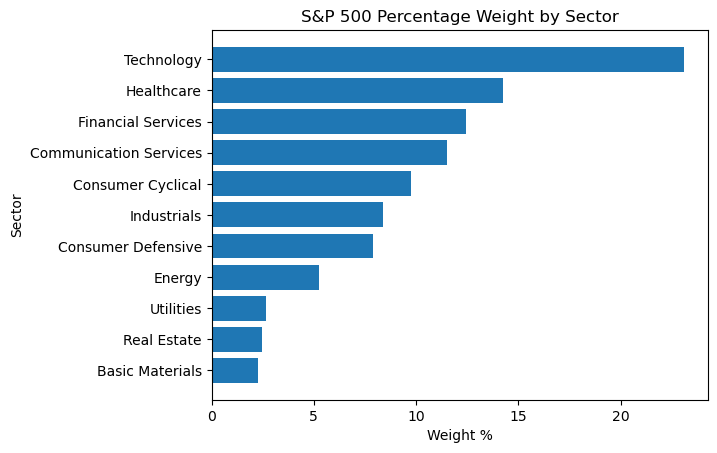

In [231]:
#visualize sector weight
sector_weight = pd.DataFrame(sector_weight)
plt.barh(data=sector_weight, y=sector_weight.index, width='Weight')
plt.xlabel('Weight %')
plt.ylabel('Sector')
plt.title('S&P 500 Percentage Weight by Sector')
plt.show()

In [233]:
#No of companies in each sector
count_of_sector = pd.DataFrame(spcompanies[['Symbol', 'Sector']].groupby('Sector').count())

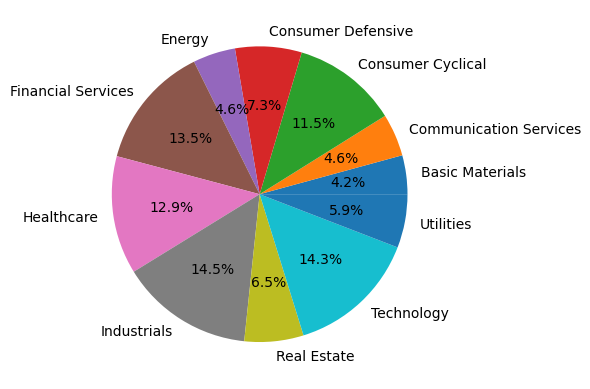

In [234]:
#visualize breakdown of companies in each sector
plt.pie(data=count_of_sector, labels=count_of_sector.index, x='Symbol', autopct='%1.1f%%')
plt.show()

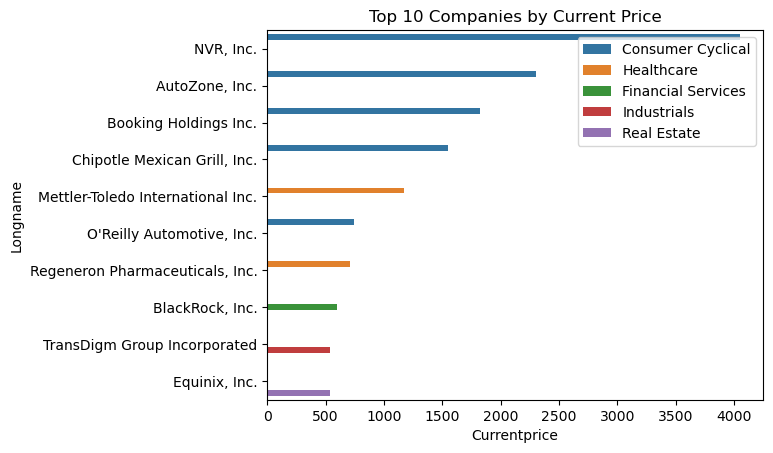

In [240]:
top10 = spcompanies[['Longname', 'Sector', 'Currentprice']].sort_values('Currentprice', ascending=False).head(10)
sns.barplot(data=top10, x='Currentprice', y='Longname', hue='Sector')
plt.title('Top 10 Companies by Current Price')
plt.legend()
plt.show()

# Dataset 3: S&P500 Index price by date
## Section A: Read and examine Data

In [101]:
#Read CSV
index = pd.read_csv('sp500_index.csv', parse_dates=['Date'])
index = pd.DataFrame(index)
index.head()

,Date,S&P500
0,2012-10-22,1433.82
1,2012-10-23,1413.11
2,2012-10-24,1408.75
3,2012-10-25,1412.97
4,2012-10-26,1411.94


## Section B: Manipulate and Add Data

In [261]:
#Add a row by row change column
change = []
for i in range(len(index)):
    if i == 0:
        change.append(0)
    else:
        change.append(index['S&P500'][i] - index['S&P500'][(i - 1)])
    i += 1
index['change'] = change
index.head()

,Date,S&P500,Year,change
0,2012-10-22,1433.82,2012,0.00
1,2012-10-23,1413.11,2012,-20.71
2,2012-10-24,1408.75,2012,-4.36
3,2012-10-25,1412.97,2012,4.22
4,2012-10-26,1411.94,2012,-1.03


## Section C: Analyze Data

In [241]:
#2022 Data and October 2022 Data
index2022 = index[index['Date'].dt.year == 2022]
index2022October = index2022[index2022['Date'].dt.month == 10]

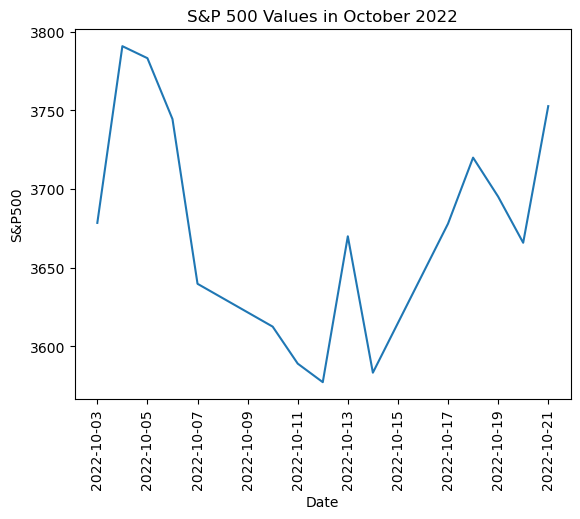

In [243]:
sns.lineplot(data=index2022October, x='Date', y='S&P500')
plt.xticks(rotation=90)
plt.title('S&P 500 Values in October 2022')
plt.show()

In [245]:
index['Year'] = index['Date'].dt.year
per_year_max = index.groupby('Year').max()
per_year_max

,Date,S&P500
Year,,
2012,2012-12-31,1446.79
2013,2013-12-31,1848.36
2014,2014-12-31,2090.57
2015,2015-12-31,2130.82
2016,2016-12-30,2271.72
2017,2017-12-29,2690.16
2018,2018-12-31,2930.75
2019,2019-12-31,3240.02
2020,2020-12-31,3756.07


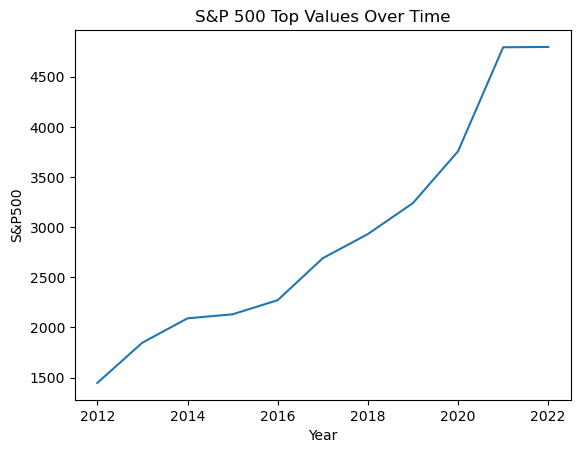

In [246]:
sns.lineplot(data=per_year_max, x=per_year_max.index, y='S&P500')
plt.title('S&P 500 Top Values Over Time')
plt.show()

In [265]:
#good band and even days for S&P500
good_bad_even = {}
good_bad_even['good'] = len(index[index['change'] > 0])
good_bad_even['bad'] = len(index[index['change'] < 0])
good_bad_even['even'] = len(index[index['change'] == 0])
good_bad_even

{'good': 1367, 'bad': 1148, 'even': 2}

In [286]:
change_amount = []
years = list(index.Year.unique())
for year in years:
    change_amount.append(float(index[index['Date'] == index[index['Year'] == year]['Date'].max()]['S&P500']) - float(index[index['Date'] == index[index['Year'] == year]['Date'].min()]['S&P500']))

In [287]:
change_amount

[-7.629999999999882,
 385.9399999999998,
 226.92000000000007,
 -14.259999999999764,
 226.16999999999985,
 415.7800000000002,
 -188.96000000000004,
 720.75,
 498.22000000000025,
 1065.5300000000002,
 -1043.8100000000004]

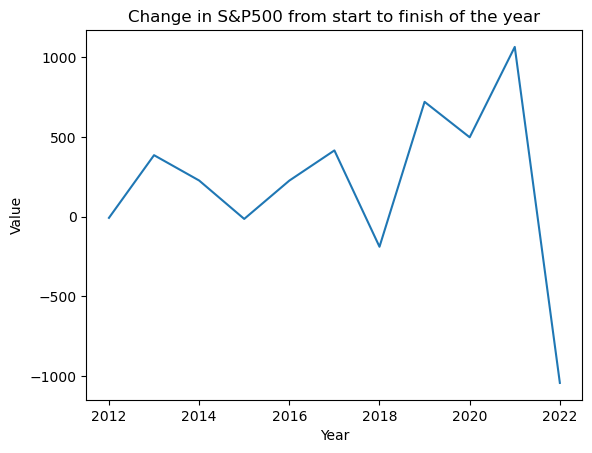

In [289]:
#change in value beginning to end of year
sns.lineplot(x=years, y=change_amount)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Change in S&P500 from start to finish of the year')
plt.show()

# Dataset 4: S&P 500 Stocks
## Section A: Load and Get Info on the Dataset

In [305]:
stocks = pd.read_csv('sp500_stocks.csv')
stocks.head(20)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
5,2010-01-11,MMM,60.004826,83.980003,84.599998,83.410004,84.379997,2927100.0
6,2010-01-12,MMM,60.054844,84.050003,84.180000,83.300003,83.580002,3031800.0
7,2010-01-13,MMM,59.861942,83.779999,84.110001,83.199997,84.110001,3102000.0
8,2010-01-14,MMM,59.661865,83.500000,83.930000,83.419998,83.739998,2634100.0
9,2010-01-15,MMM,59.568989,83.370003,84.089996,82.870003,83.519997,3955000.0


In [306]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621672 entries, 0 to 1621671
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1621672 non-null  object 
 1   Symbol     1621672 non-null  object 
 2   Adj Close  1551776 non-null  float64
 3   Close      1551776 non-null  float64
 4   High       1551776 non-null  float64
 5   Low        1551776 non-null  float64
 6   Open       1551776 non-null  float64
 7   Volume     1551776 non-null  float64
dtypes: float64(6), object(2)
memory usage: 99.0+ MB


In [307]:
stocks.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1.551776e+06,1.551776e+06,1.551776e+06,1.551776e+06,1.551776e+06,1.551776e+06
mean,8.919543e+01,9.502998e+01,9.608434e+01,9.392555e+01,9.501905e+01,5.943613e+06
std,1.677689e+02,1.675246e+02,1.696481e+02,1.653465e+02,1.675049e+02,2.052484e+07
min,7.000000e-01,7.000000e-01,7.100000e-01,6.500000e-01,7.000000e-01,0.000000e+00
25%,2.938448e+01,3.465000e+01,3.502000e+01,3.425000e+01,3.464000e+01,9.835000e+05
50%,5.269765e+01,5.968000e+01,6.029000e+01,5.903000e+01,5.967000e+01,2.124600e+06
75%,9.729000e+01,1.045100e+02,1.055700e+02,1.033700e+02,1.044800e+02,4.889400e+06
max,5.959330e+03,5.959330e+03,5.982450e+03,5.884060e+03,5.977610e+03,1.880998e+09


## Section B: View and Manipulate Data

In [308]:
#highest volume for single days
stocks.groupby('Date')['Volume'].sum().sort_values(ascending=False).head(20)

Date
2011-08-08    8.867874e+09
2010-05-07    8.488482e+09
2011-08-09    8.423628e+09
2010-05-06    8.174556e+09
2011-08-05    7.836758e+09
2011-08-10    7.484732e+09
2010-05-21    7.373687e+09
2010-05-20    7.076477e+09
2010-04-16    6.842590e+09
2011-09-22    6.772750e+09
2011-10-04    6.515909e+09
2011-08-11    6.445664e+09
2011-08-04    6.399640e+09
2020-03-20    6.329977e+09
2011-08-18    6.285307e+09
2010-01-29    6.222788e+09
2020-03-12    6.184971e+09
2010-10-15    6.177437e+09
2010-06-29    6.173025e+09
2010-01-21    6.172452e+09
Name: Volume, dtype: float64

In [310]:
stocks['Symbol'].unique()

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
       'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK',
       'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX',
       'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA',
       'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B',
       'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
       'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP',
       'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD',
       'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS',
       'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', '

## Section C: Subset and Visualize Data

In [312]:
apple = stocks[stocks['Symbol'] == 'AAPL']
apple['DateTime'] = pd.to_datetime(apple['Date'])
apple2022 = apple[apple['DateTime'].dt.year == 2022]
apple2022

/var/folders/b6/4qc_2zbx4bg37ybn_70yv7xc0000gn/T/ipykernel_22877/3955021041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['DateTime'] = pd.to_datetime(apple['Date'])


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,DateTime
148101,2022-01-03,AAPL,182.009995,182.009995,182.880005,177.710007,177.830002,104487900.0,2022-01-03
148102,2022-01-04,AAPL,179.699997,179.699997,182.940002,179.119995,182.630005,99310400.0,2022-01-04
148103,2022-01-05,AAPL,174.919998,174.919998,180.169998,174.639999,179.610001,94537600.0,2022-01-05
148104,2022-01-06,AAPL,172.000000,172.000000,175.300003,171.639999,172.699997,96904000.0,2022-01-06
148105,2022-01-07,AAPL,172.169998,172.169998,174.139999,171.029999,172.889999,86709100.0,2022-01-07
...,...,...,...,...,...,...,...,...,...
148299,2022-10-17,AAPL,142.410004,142.410004,142.899994,140.270004,141.070007,85250900.0,2022-10-17
148300,2022-10-18,AAPL,143.750000,143.750000,146.699997,140.610001,145.490005,99136600.0,2022-10-18
148301,2022-10-19,AAPL,143.860001,143.860001,144.949997,141.500000,141.690002,61758300.0,2022-10-19
148302,2022-10-20,AAPL,143.389999,143.389999,145.889999,142.649994,143.020004,64522000.0,2022-10-20


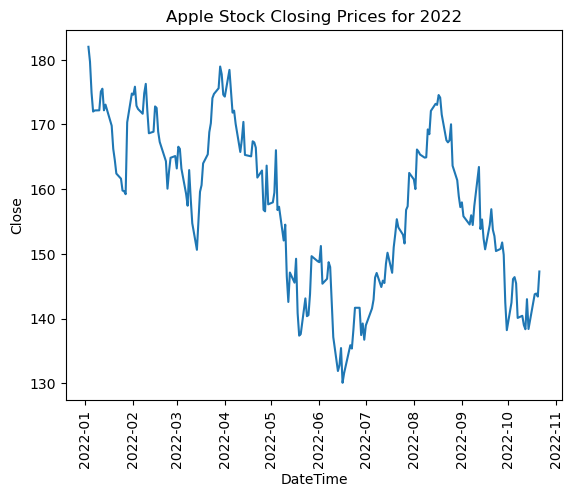

In [323]:
sns.lineplot(data=apple2022, x='DateTime', y='Close')
plt.title('Apple Stock Closing Prices for 2022')
plt.xticks(rotation=90)
plt.show()

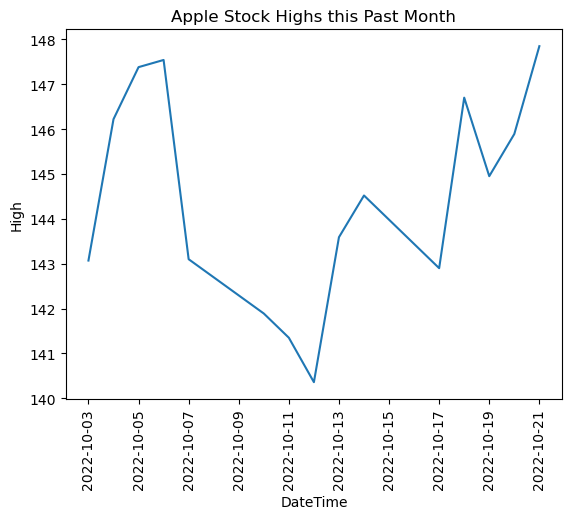

In [322]:
apple2022October = apple2022[apple2022['DateTime'].dt.month == 10]
sns.lineplot(data=apple2022October, x='DateTime', y='High')
plt.xticks(rotation=90)
plt.title('Apple Stock Highs this Past Month')
plt.show()